# **INICIO**


https://peterroelants.github.io/posts/multivariate-normal-primer/
https://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/09_naive_bayes.pdf
https://www.ppgee.ufmg.br/defesas/1176M.PDF
https://en.m.wikipedia.org/wiki/Multivariate_normal_distribution
https://jrnold.github.io/intro-methods-notes/ols-in-matrix-form.html#residuals
https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf
https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf
https://max.pm/posts/ols_matrix/
https://online.stat.psu.edu/stat462/node/132/


# Import das bibliotecas


In [17]:
import numpy as np
import math as mt
from numpy import ndarray
import matplotlib.pyplot as plt


# Carregamento dos dados para memória


In [18]:
data = np.loadtxt('EMG.csv', delimiter=',')
rotulos = np.loadtxt('Rotulos.csv', delimiter=',')

# Definicao de rodadas


In [19]:
RODADAS = 1#00

# OLS (Ordinary least squares)


In [20]:
class OLS():

    def __init__(self, Xtreino: ndarray, Ytreino: ndarray, Xteste: ndarray, Yteste: ndarray, _lambda: float = 0):
        self.Xtreino = Xtreino
        self.Ytreino = Ytreino
        self.Xteste = Xteste
        self.Yteste = Yteste
        self._lambda = _lambda
        self.beta = self.__estimacao(Xtreino, Ytreino)
        self.yhat = self.__previsao(Xteste, self.beta)
        self.bias = self.yhat[0]
        self.coeficitentes = self.yhat[1:]
        self.metrics = self.__metricas(self.yhat, Yteste)
        self.mean = np.mean(self.yhat)
        self.min_max = (np.min(self.yhat), np.max(self.yhat))
        self.std = np.std(self.yhat)
        self.truePositives = np.diag(self.yhat)
        self.falseNegatives = np.sum(self.yhat, axis=0) - self.truePositives
        self.precision = self.truePositives / (self.truePositives + self.falseNegatives)

    def __estimacao(self, X: ndarray, Y: ndarray) -> ndarray:
        x: ndarray = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        return np.linalg.pinv(x.T@x + (self._lambda*np.identity(x.shape[1])))@x.T@Y

    def __previsao(self, Xteste: ndarray, betas: ndarray) -> ndarray:
        x: ndarray = np.concatenate((np.ones((Xteste.shape[0], 1)), Xteste), axis=1)
        return x@betas

    def __metricas(self, predictions: ndarray, Y_test: ndarray) -> dict:
        
        # media erro absoluto
        MAE = np.mean(np.abs(predictions-Y_test))

        # raiz
        MSE = np.square(predictions-Y_test).mean()
        RMSE = np.sqrt(MSE)

        # calculating r_square
        rss = np.sum(np.square(predictions-Y_test))
        mean = np.mean(Y_test)
        sst = np.sum(np.square(Y_test-mean))
        r_square = 1 - (rss/sst)
        return {'MAE': MAE, 'RMSE': RMSE, 'r_square': r_square}

    def plot(self):
        x1_range = np.linspace(self.Xtreino[:,0].min() - 1, self.Xtreino[:,0].max() + 1,100)
        x2_range = np.linspace(self.Xtreino[:,1].min() - 1, self.Xtreino[:,1].max() + 1,100)
        mesh_x1,mesh_x2 = np.meshgrid(x1_range,x2_range)
        coe = self.coeficitentes.T
        bias = self.bias.T
        hiperplanos = np.empty((len(x1_range),len(x2_range),coe.shape[0]))
        for i in range(coe.shape[0]):
          hiperplanos[:,:,i] = coe[i,0] * mesh_x1 + coe[i,1] * mesh_x2 + bias[i]

        colors = ['red', 'green', 'blue', 'yellow', 'cyan']
        r = ['neutro', 'sorrindo', 'aberto', 'surpreso' ,'grumpy']
        step = 1000
        plt.figure(figsize=(20,15))
        classes = {
            0: {
                'x':[],
                'y':[]
            },
            1: {
                'x': [],
                'y': []
            }, 
            2: {
                'x': [],
                'y': []
            },
            3: {
                'x': [],
                'y': []
            }, 
            4: {
                'x': [],
                'y': []
            }
        }
        for i in np.arange(0, data.shape[0], step=step):
            classe = int((i % (step*5))/step)
            a = data[i:i+step, 0]
            b = data[i:i+step, 1]
            classes[classe]['x'].extend(a)
            classes[classe]['y'].extend(b)
        for i in classes.keys():
          plt.scatter(x=classes[i]['x'],y=classes[i]['y'],c=colors[i],label=r[i],alpha=0.7)

        for i in range(coe.shape[0]):
          plt.contour(mesh_x1, mesh_x2, hiperplanos[:,:,i], levels=[0], colors='black', linewidths=1)

        plt.legend()
        plt.show()
    def __str__(self) -> str:
      min, max = self.min_max
      return f'{self._lambda:.2f} & {self.mean:.2f} & {min:.2f} & {max:.2f} & {self.std:.2f} \\\\'
      #return f'Lambda: {self._lambda:.2f} media:{self.mean:.2f} min: {min:.2f} max: {max:.2f} std: {self.std:.2f}' 



# FDP (Função de Densidade e Probabilidade Normal)


In [21]:
class FDP():

    classes = {
        0: np.array([]),
        1: np.array([]),
        2: np.array([]),
        3: np.array([]),
        4: np.array([])
    }

    classificacao = {
        0: np.array([]),
        1: np.array([]),
        2: np.array([]),
        3: np.array([]),
        4: np.array([])
    }

    medias = {

    }

    covs = {
        
    }

    def __init__(self, Xtreino: ndarray, Ytreino: ndarray, Xteste: ndarray, Yteste: ndarray, _lambda: float = 0, pooled=False):
        self._lambda = _lambda
        self.pooled = pooled
        self.Xtreino = Xtreino
        self.Ytreino = Ytreino
        self.Xteste = Xteste
        self.Yteste = Yteste
        self.classify()
        self.estimacao()


    def classify(self):
        classes = {
            0: np.array([]),
            1: np.array([]),
            2: np.array([]),
            3: np.array([]),
            4: np.array([])
        }
        for i,j in enumerate(self.Ytreino, 0):
            for k in classes.keys():
                if j[k] == 1:
                  classes[k] = np.append(classes[k], [i])
        for k in classes.keys():
            v = self.Xtreino[classes[k].astype(int),:]
            self.medias[k] = v.mean(axis=0).reshape((2,1))
            x,y = v.shape
            self.classes[k] = v.reshape((y,x))
            self.covs[k] = np.cov(self.classes[k])

        
    def estimacao(self):
        for k in self.classes.keys():
            mu = self.medias[k]
            cov = self.covs[k]
            p = cov.ndim
            if self.pooled:
              cov = self.agr_matrix()
            else:
              if self._lambda == 0:
                pass
              if self._lambda == 1:
                cov = self.regularizacao(self.classes[k], mu, self.covs[k], self._lambda)
            self.classificacao[k] = self.multivariate_normal(self.classes[k], p, mu, cov)

    def multivariate_normal(self,x, d, mean, covariance):
        x_m = x - mean
        return (1 / (self.part_1(d,covariance) * np.exp(self.descriminante(x_m,covariance))))
    
    def part_1(self,d,covariance):
        return (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance)))

    def descriminante(self,x_m,covariance):
        return -(1/2)*x_m.T@np.linalg.pinv(covariance)@x_m
        
    def agr_matrix(self):
      return np.array([self.covs[i] for i in self.covs]).sum(axis=0)

    def regularizacao(self, x:ndarray, mean:ndarray, covariance:ndarray, _lambda:float):
      matriz_agr = self.agr_matrix()
      return (((1 - _lambda)*(x * covariance) + (_lambda * x.shape[1] * matriz_agr))/((1 - _lambda) * x  + _lambda * x.shape[1]))

    def previsao(self):
        for i in self.classificacao:
            print(np.argmax(self.classificacao[i]))

    def __str__(self) -> str:
      medias = np.array([])
      mins = np.array([])
      maxs = np.array([])
      stds = np.array([])
      for i in self.classificacao:
        v = self.classificacao[i]
        medias = np.append(medias,v.mean())
        mins = np.append(mins,v.min())
        maxs = np.append(maxs,v.max())
        stds = np.append(stds,v.std())
      print(medias)
      print(mins)
      print(maxs)
      print(stds)
      #{self._lambda:.2f} &
      return f'{medias.mean():.3f} & {mins.min():.3f} & {maxs.max():.3f} & {stds.std():.3f} \\\\'


# Treinamento


In [22]:
for i in range(RODADAS):
    seed = np.random.permutation(data.shape[0])

    X = data[seed, :]
    Y = rotulos[seed, :]

    cut: float = 0.8

    Xtreino = X[0:int(X.shape[0] * cut), :]
    Ytreino = Y[0:int(X.shape[0] * cut), :]

    Xteste = X[int(X.shape[0] * cut):, :]
    Yteste = Y[int(X.shape[0] * cut):, :]

    # ## OLS ##

    # ols = OLS(Xteste=Xteste, Yteste=Yteste, Xtreino=Xtreino, Ytreino=Ytreino)
    # print(ols)

    # ### OLS regulariazado ###
    # for _lambda in np.arange(0, 1, 0.1):
    #     ols = OLS(Xteste=Xteste, Yteste=Yteste, Xtreino=Xtreino,Ytreino=Ytreino, _lambda=_lambda)
    #     print(ols)
    fdp = FDP(Xteste=Xteste, Yteste=Xteste, Xtreino=Xtreino, Ytreino=Ytreino)
    print(fdp)
    bp = 1


/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


[1.00051171e+068 7.80287024e+200 6.29082729e-006 4.64077988e-006
 2.51002514e-006]
[3.15441324e-06 1.72562100e+38 3.88152965e-09 4.54790651e-09
 2.34353063e-09]
[6.42282344e+075 5.08585640e+208 3.58673129e-001 4.94135161e+000
 2.38118276e+000]
[8.00552399e+71            inf 1.47560953e-04 1.13632524e-03
 5.73114491e-04]
156057404770463435635142894572150904895522536063483385798510418170144927816048054857260439612087832767601385683209099812596761103760995202955237074280890891705404264481731610783297805085232373400862720.000 & 0.000 & 50858564042471293183897367103132963104839173241406506900286121221725299296429454393540104709397692539763383160612484796300664053937775086446330935146932137719150118950104730079469345163458396775088461413613568.000 & nan \\


/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


# Plot dos dados


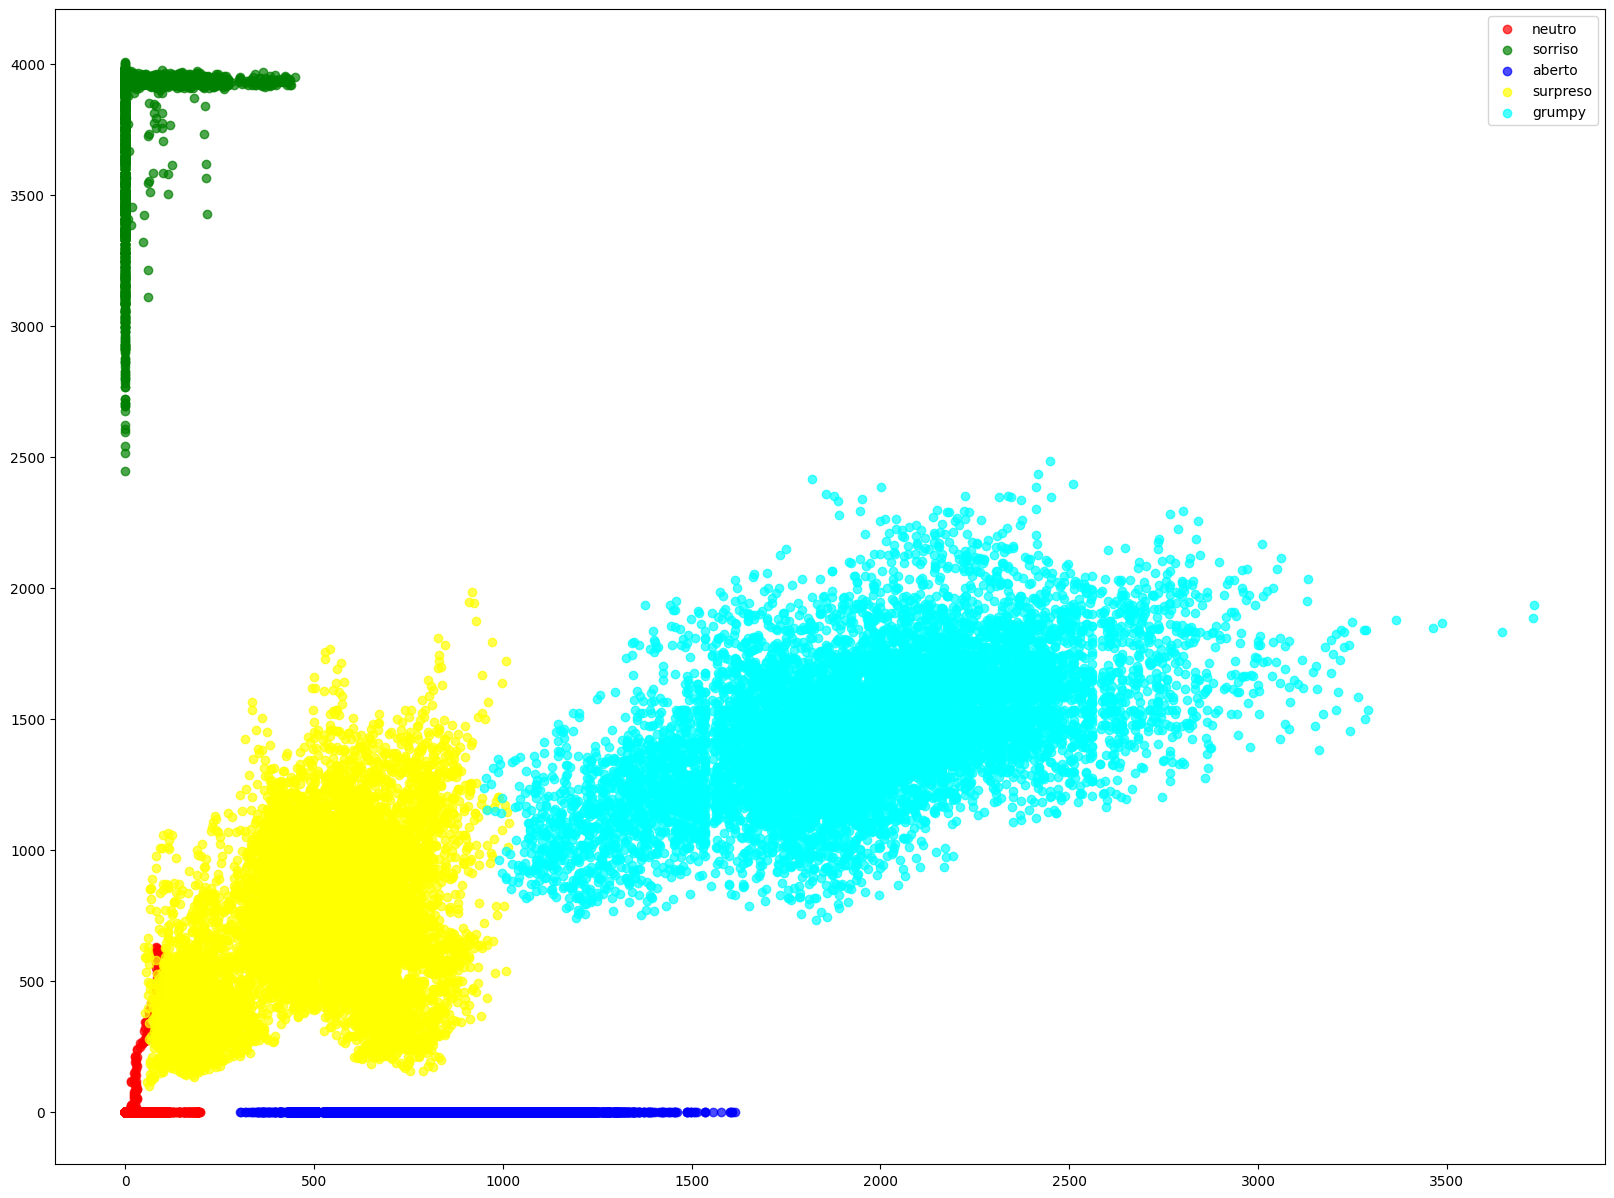

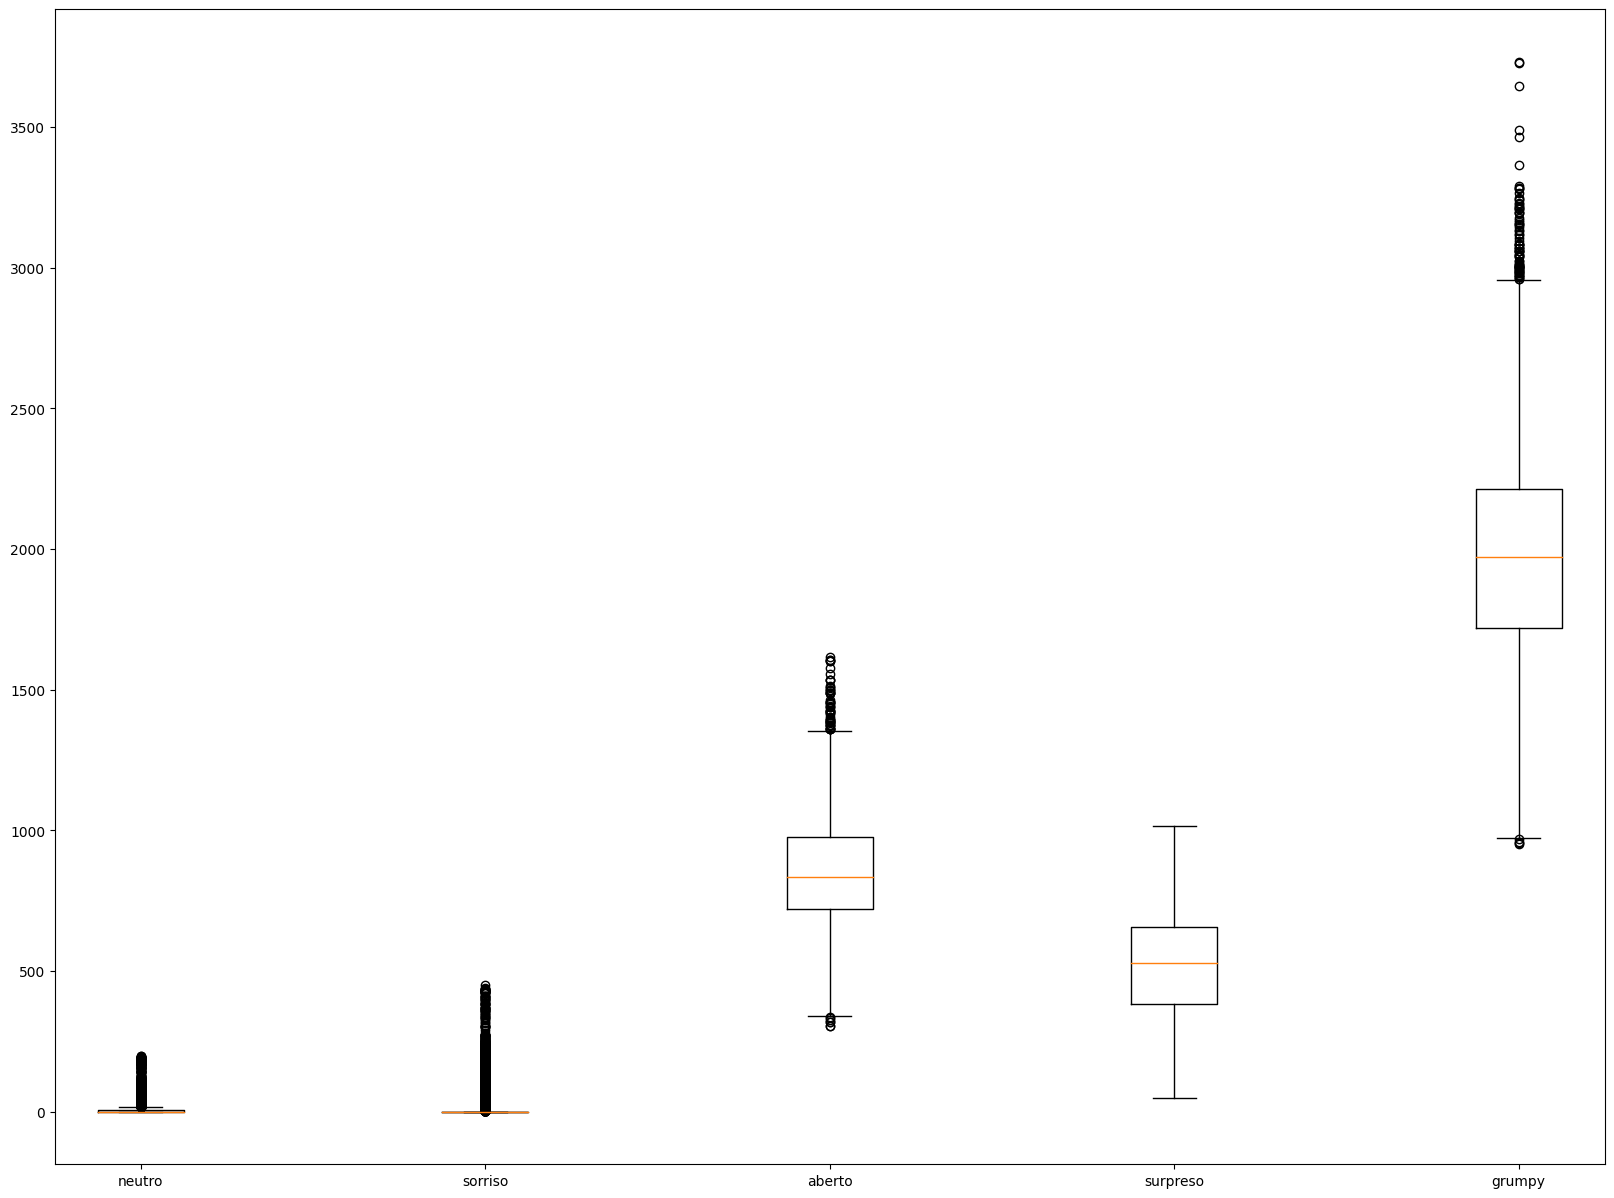

In [23]:

colors = ['red', 'green', 'blue', 'yellow', 'cyan']
labels=['neutro', 'sorriso', 'aberto', 'surpreso', 'grumpy']
step = 1000
classes = {
    0: {
        'x':[],
        'y':[]
    },
    1: {
        'x': [],
        'y': []
    }, 
    2: {
        'x': [],
        'y': []
    },
    3: {
        'x': [],
        'y': []
    }, 
    4: {
        'x': [],
        'y': []
    }
}
for i in np.arange(0, data.shape[0], step=step):
    classe = int((i % (step*5))/step)
    a = data[i:i+step, 0]
    b = data[i:i+step, 1]
    classes[classe]['x'].extend(a)
    classes[classe]['y'].extend(b)


plt.figure(figsize=(20, 15))
for i in classes.keys():
  plt.scatter(x=classes[i]['x'], y=classes[i]['y'],c=colors[i],label=labels[i],alpha=0.7)
plt.legend()


plt.figure(figsize=(20, 15))
plt.boxplot([classes[i]['x'] for i in classes.keys()],positions=[0,2,4,6,8],labels=labels)

plt.show()



